<a href="https://colab.research.google.com/github/puneethraj28/Data_Science_DLithe-/blob/main/DataScience_Internship_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('sgemm_product.csv')

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,115.13,121.98,122.73,114.81


In [ ]:
df.shape

(36772, 18)

In [ ]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000,36771.000000
mean,23.757207,59.502665,24.033939,11.572283,13.416295,13.558142,16.152511,4.995023,1.407277,2.112616,0.499959,0.499959,0.499986,0.499986,60.623852,60.701765,60.598025,60.614665
std,7.996424,39.207884,8.000037,5.554766,7.400271,7.120949,8.998124,3.000037,0.716195,1.697754,0.500007,0.500007,0.500007,0.500007,27.663069,27.677164,27.690643,27.692555
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.920000,17.850000,17.880000,17.840000
25%,16.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.890000,40.960000,40.880000,40.890000
50%,16.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,54.060000,54.110000,54.020000,54.050000
75%,32.000000,64.000000,32.000000,16.000000,16.000000,16.000000,16.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,71.565000,71.710000,71.560000,71.630000
max,32.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,4.000000,8.000000,1.000000,1.000000,1.000000,1.000000,306.060000,306.080000,306.120000,306.050000


In [ ]:
df['NDIMC'].unique()

array([ 8, 16, 32])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MWG        36772 non-null  int64  
 1   NWG        36772 non-null  int64  
 2   KWG        36772 non-null  int64  
 3   MDIMC      36772 non-null  int64  
 4   NDIMC      36772 non-null  int64  
 5   MDIMA      36772 non-null  int64  
 6   NDIMB      36771 non-null  float64
 7   KWI        36771 non-null  float64
 8   VWM        36771 non-null  float64
 9   VWN        36771 non-null  float64
 10  STRM       36771 non-null  float64
 11  STRN       36771 non-null  float64
 12  SA         36771 non-null  float64
 13  SB         36771 non-null  float64
 14  Run1 (ms)  36771 non-null  float64
 15  Run2 (ms)  36771 non-null  float64
 16  Run3 (ms)  36771 non-null  float64
 17  Run4 (ms)  36771 non-null  float64
dtypes: float64(12), int64(6)
memory usage: 5.0 MB


In [ ]:
#creating Runtime, target variable by taking average of Run1, Run2, Run3, Run4

df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)


In [ ]:
#drop other Run time variables

df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run,Runtime
0,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,116.3700,116.3700
1,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.7050,78.7050
2,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,80.5650,80.5650
3,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,86.6375,86.6375
4,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,118.6625,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36767,32,64,16,16,8,32,8.0,2.0,1.0,8.0,1.0,1.0,1.0,1.0,28.9975,28.9975
36768,32,64,16,16,8,32,8.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,53.9350,53.9350
36769,32,64,16,16,8,32,8.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0,58.4575,58.4575
36770,32,64,16,16,8,32,8.0,8.0,1.0,1.0,0.0,0.0,1.0,0.0,49.0675,49.0675


In [ ]:
#checking for NULL values

df1.isnull().sum() 

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      1
KWI        1
VWM        1
VWN        1
STRM       1
STRN       1
SA         1
SB         1
Run        1
Runtime    1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


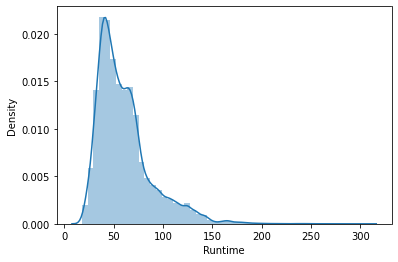

In [ ]:
#plotting the distribution of Runtime
sns.distplot(df1['Runtime'])

In [ ]:
X=df.iloc[:,0:10]

In [ ]:
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,16,16,16,8,8,8,8.0,2.0,1.0,1.0
1,16,16,16,8,8,8,8.0,2.0,1.0,1.0
2,16,16,16,8,8,8,8.0,2.0,1.0,1.0
3,16,16,16,8,8,8,8.0,2.0,1.0,1.0
4,16,16,16,8,8,8,8.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
36767,32,64,16,16,8,32,8.0,2.0,1.0,8.0
36768,32,64,16,16,8,32,8.0,8.0,1.0,1.0
36769,32,64,16,16,8,32,8.0,8.0,1.0,1.0
36770,32,64,16,16,8,32,8.0,8.0,1.0,1.0


In [ ]:
y=df.iloc[:,14]

In [ ]:
y

0        115.26
1         78.13
2         79.84
3         84.32
4        115.13
          ...  
36767     28.81
36768     53.94
36769     58.48
36770     49.08
36771       NaN
Name: Run1 (ms), Length: 36772, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
mse=[]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
# calculate mean square error

mse = mean_squared_error(y_train, y_pred)

mse

530.9345208953158

In [ ]:
# calculate mean square error

mse = mean_squared_error(y_train, y_pred)

mse

530.9345208953158

In [ ]:
import seaborn as sns

In [ ]:
MWG = df.groupby('MWG')['MWG'].count()

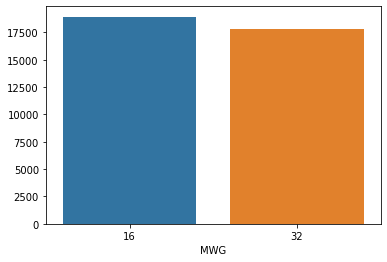

In [ ]:
sns.barplot(x=MWG.index,y=MWG.values)

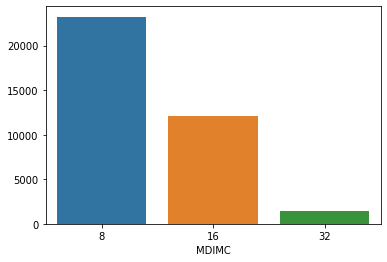

In [ ]:
MDIMC = df.groupby('MDIMC')['MDIMC'].count()

sns.barplot(x=MDIMC.index,y=MDIMC.values)

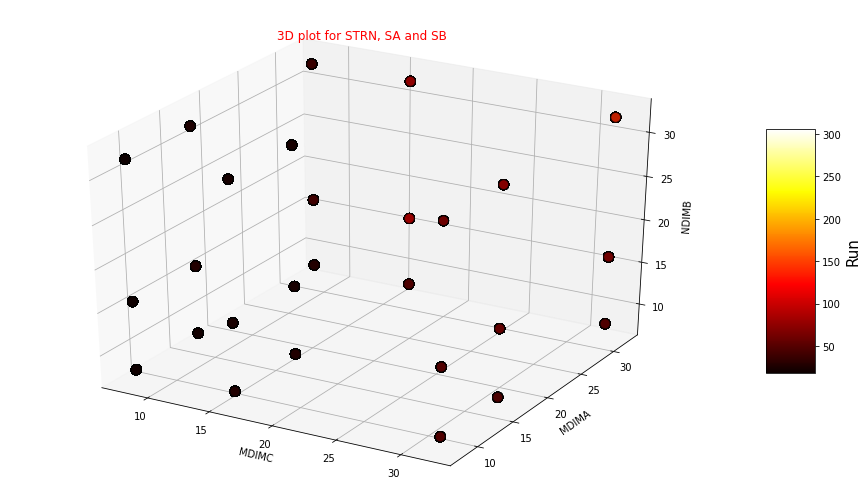

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["MDIMC"],
           df["MDIMA"],
           df["NDIMB"],
           linewidth=1,edgecolor ="k",
           c=df["Run"],s=100,cmap="hot")

ax.set_xlabel("MDIMC")
ax.set_ylabel("MDIMA")
ax.set_zlabel("NDIMB")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Run",fontsize = 15)

plt.title("3D plot for STRN, SA and SB ",color="red")
plt.show()


In [ ]:
features = df[['MWG',	'NWG',	'KWG',	'MDIMC',	'NDIMC',	'MDIMA',	'NDIMB',	'KWI',	'VWM',	'VWN',	'STRM',	'STRN',	'SA',	'SB',	'Run', 'Runtime']]
features.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run,Runtime
0,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,116.3700,116.3700
1,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,78.7050,78.7050
2,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,80.5650,80.5650
3,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,86.6375,86.6375
4,16,16,16,8,8,8,8.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,118.6625,118.6625


In [ ]:
labels = df[['NDIMB']]
labels.head()

,NDIMB
0,8.0
1,8.0
2,8.0
3,8.0
4,8.0


In [ ]:
from sklearn.model_selection import train_test_split
# it will return four variables, X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

In [ ]:
X_train.shape, X_test.shape

((31256, 16), (5516, 16))

In [ ]:
y_train.shape, y_test.shape

((31256, 1), (5516, 1))